# EDA Processed

欄位說明:

-   PassengerId: 乘客編號
-   Survived: 是否存活
-   Pclass: 艙等
-   Name: 姓名
-   Sex: 性別
-   Age: 年齡
-   SibSp: 同行兄弟姊妹/配偶數
-   Parch: 同行父母/子女數
-   Ticket: 票號
-   Fare: 船票價格
-   Cabin: 客艙編號
-   Embarked: 登船港口

## 載入套件與基本設定

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("pastel")
plt.rcParams['figure.figsize'] = (10, 6)

## 載入資料

In [2]:
train_df = pd.read_csv('../data/processed/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 檢查特徵與生存關係

### 倖存比

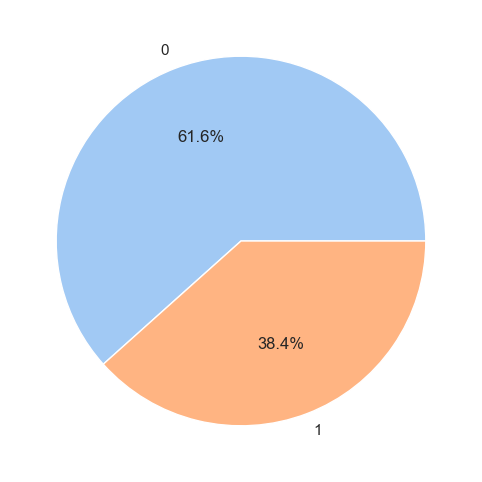

In [10]:
survived_count = train_df['Survived'].value_counts()
survived_label = survived_count.index
plt.pie(survived_count, labels=survived_label, autopct='%.1f%%')
plt.show()

從以上圓餅圖來看，鐵達尼號罹難乘客多於倖存乘客，比例約3:2。

### 乘客年齡比

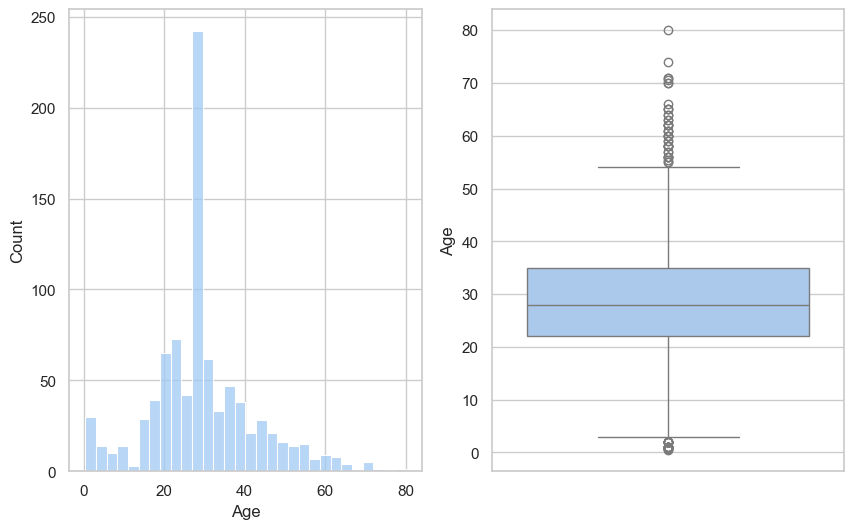

In [11]:
figure, axes = plt.subplots(1, 2)
sns.histplot(train_df, x='Age', ax=axes[0])
sns.boxplot(train_df, y='Age', ax=axes[1])
plt.show()

大多數乘客年齡位於20歲到40歲之間，但有不少老年乘客以及嬰兒。

### 乘客年齡與是否倖存

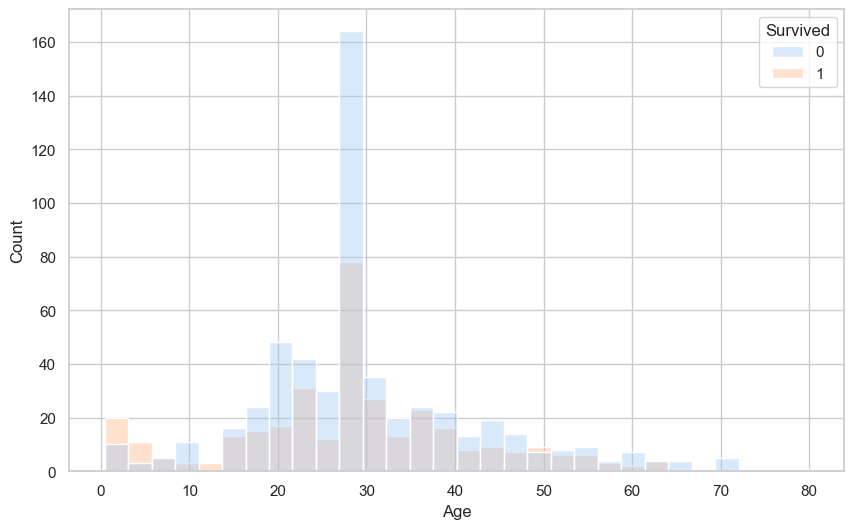

In [13]:
sns.histplot(train_df, x='Age', hue='Survived', alpha=0.4)
plt.show()

從乘客年齡直方圖來看，只有嬰兒群倖存比例較高，絕大部分其餘年齡層都是罹難人數多於倖存人數。

### 船票金額分佈

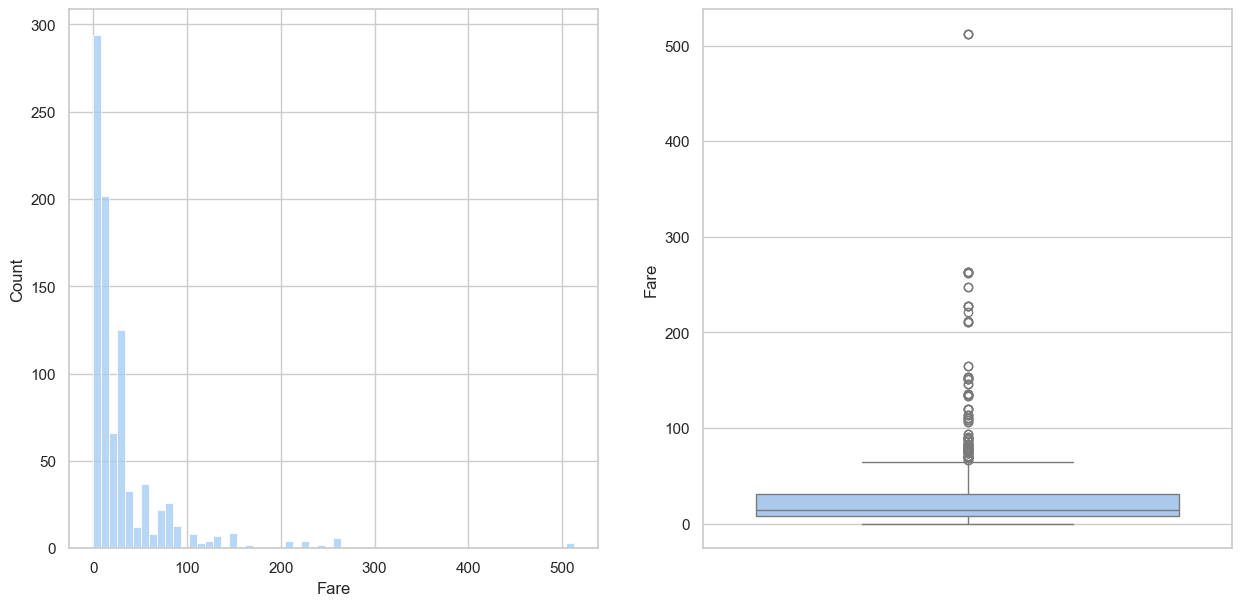

In [14]:
figure, axes = plt.subplots(1, 2, figsize=[15, 7])
sns.histplot(train_df, x='Fare', ax=axes[0])
sns.boxplot(train_df, y='Fare', ax=axes[1])
plt.show()

船票金額呈現右偏態分佈，顯示資料集中的大多數船票價格中等，但有一些票價很高的極端值，使得平均值被拉高。

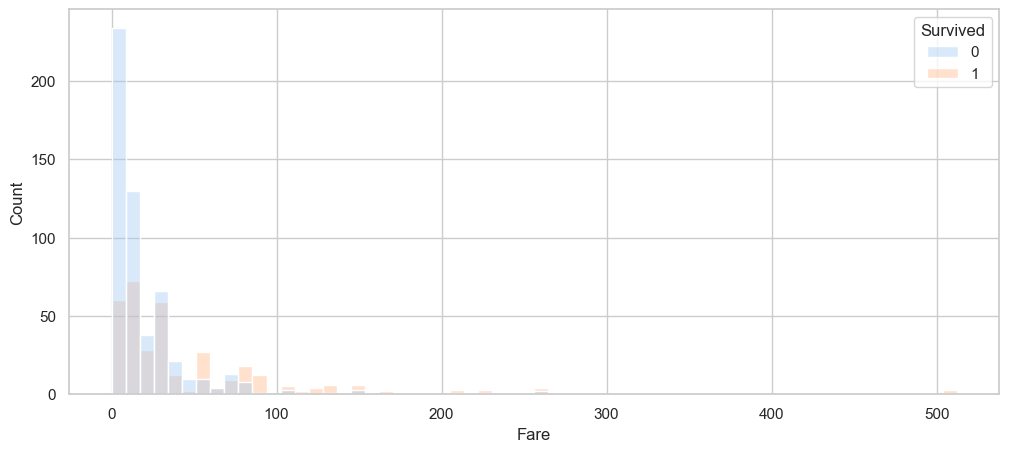

In [15]:
plt.subplots(1, 1, figsize=[12, 5])
sns.histplot(train_df, x='Fare', hue='Survived', alpha=0.4)
plt.show()

### 船艙等級與是否倖存的關係

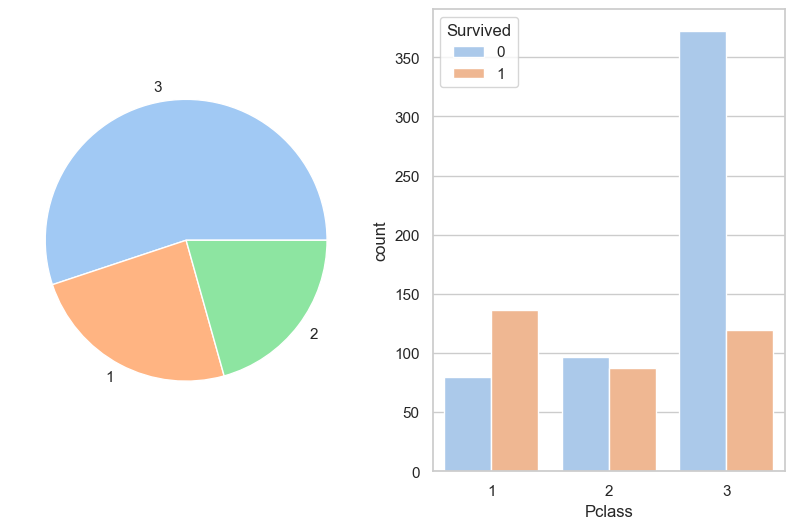

In [16]:
figure, axes = plt.subplots(1, 2)
pclass_count = train_df['Pclass'].value_counts()
pclass_label = pclass_count.index
axes[0].pie(pclass_count, labels=pclass_label)
sns.countplot(train_df, x='Pclass', hue='Survived', ax=axes[1])
plt.show()

從是否倖存與船艙等級之間的長條圖來看，船艙等級低的乘客中遇難比例更大，船艙等級高的乘客中倖存比例更大。

### 性別與是否存活的關係

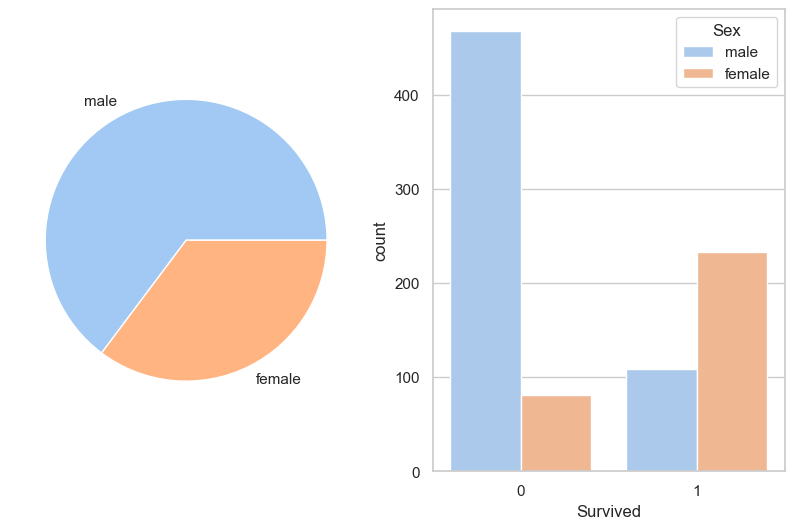

In [17]:
figure, axes = plt.subplots(1, 2)
sex_count = train_df['Sex'].value_counts()
sex_label = sex_count.index
axes[0].pie(sex_count, labels=sex_label)
sns.countplot(train_df, x='Survived', hue='Sex', ax=axes[1])
plt.show()

從是否倖存與性別之間的長條圖來看，男性乘客中遇難比例更大，女性乘客中倖存比例更大。

### 登船港與是否倖存的關係

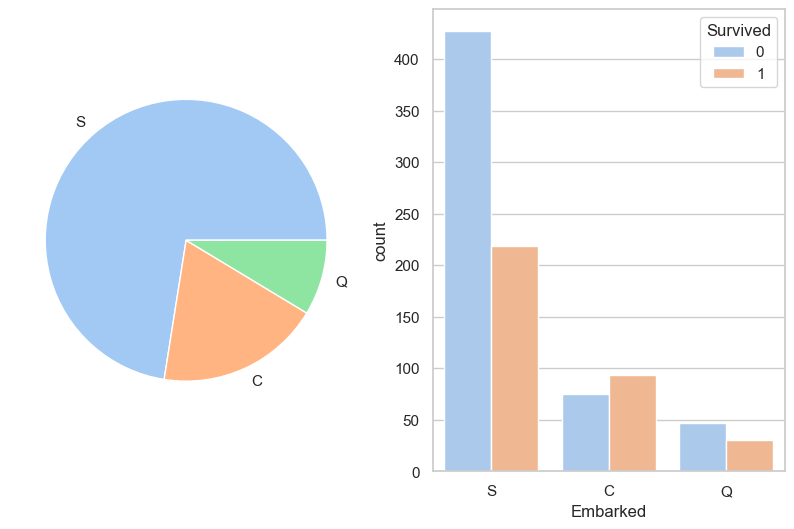

In [18]:
figure, axes = plt.subplots(1, 2)
embarked_count = train_df['Embarked'].value_counts()
embarked_label = embarked_count.index
axes[0].pie(embarked_count, labels=embarked_label)
sns.countplot(train_df, x='Embarked', hue='Survived', ax=axes[1])
plt.show()

從是否倖存與登船港之間的長條圖來看，瑟堡登船的乘客，倖存數量大於遇難數量，而皇后鎮和南安普敦則相反。

### 家庭成員數與是否存活的關係

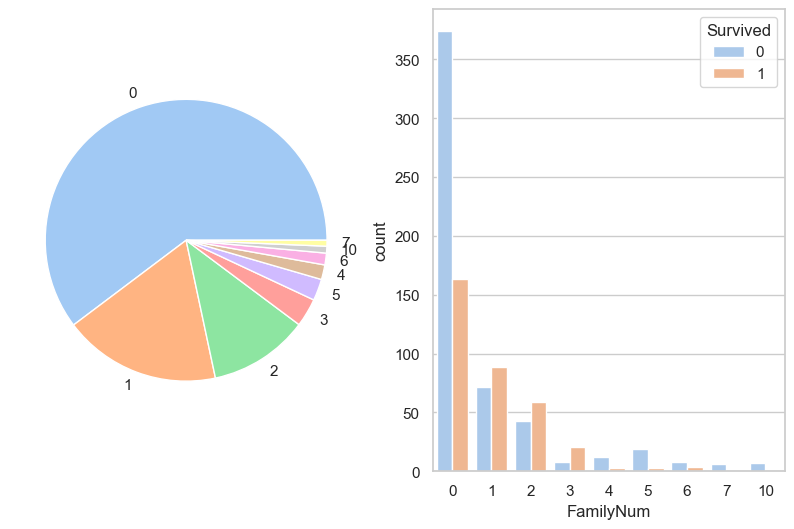

In [20]:
figure, axes = plt.subplots(1, 2)

train_df['FamilyNum'] = train_df['SibSp'] + train_df['Parch']
familyNum_count = train_df['FamilyNum'].value_counts()
familyNum_label = familyNum_count.index
axes[0].pie(familyNum_count, labels=familyNum_label)
sns.countplot(train_df, x='FamilyNum', hue='Survived', ax=axes[1])
plt.show()

從是否倖存與乘客家庭成員之間的長條圖來看，獨身的乘客中遇難的多於倖存的。從有攜帶家庭成員的乘客來看，家庭成員在1～3位之間的倖存人數超過遇難人數，但同乘家庭成員超過3位後，遇難的更多。

### 相關係數圖

各特徵平均值 by Survived:
Survived              0           1
PassengerId  447.016393  444.368421
Pclass         2.531876    1.950292
Age           30.028233   28.291433
Fare          22.117887   48.395408
FamilySize     0.883424    0.938596


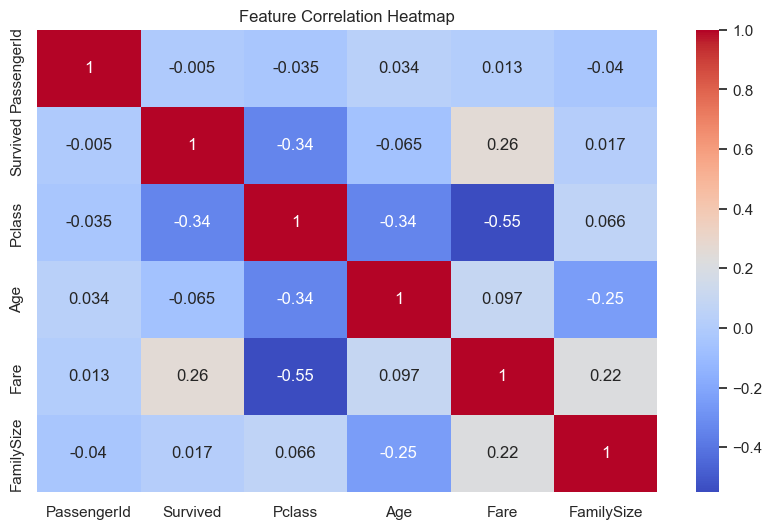

In [23]:
print("各特徵平均值 by Survived:")
print(train_df.groupby('Survived').mean(numeric_only=True).T)

# Correlation heatmap
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()